# <center>  Yelp Review
---
---

The data is a detailed dump of Yelp reviews, businesses, users, and checkins for the Phoenix, AZ metropolitan area.

---
Data :
[yelp review](https://data.world/brianray/yelp-reviews)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import wordcloud
from wordcloud import WordCloud

In [2]:
#read dataset
df = pd.read_csv('yelp_training_set_review.csv')

In [3]:
df.head(3)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              229907 non-null  int64  
 1   business_blank          229907 non-null  bool   
 2   business_categories     229130 non-null  object 
 3   business_city           229907 non-null  object 
 4   business_full_address   229907 non-null  object 
 5   business_id             229907 non-null  object 
 6   business_latitude       229907 non-null  float64
 7   business_longitude      229907 non-null  float64
 8   business_name           229907 non-null  object 
 9   business_neighborhoods  0 non-null       float64
 10  business_open           229907 non-null  bool   
 11  business_review_count   229907 non-null  int64  
 12  business_stars          229907 non-null  float64
 13  business_state          229907 non-null  object 
 14  business_type       

In [5]:
#list of data columns
df.columns

Index(['Unnamed: 0', 'business_blank', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_neighborhoods',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'business_type', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful',
       'user_id'],
      dtype='object')

In [6]:
data = df[['business_categories', 'business_city',
       'business_name','business_open', 'business_review_count', 'business_stars',
       'business_state', 'cool', 'date', 'funny',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count', 'reviewer_useful', 
        'stars', 'text', 'useful']]

In [7]:
data.isnull().sum()

business_categories         777
business_city                 0
business_name                 0
business_open                 0
business_review_count         0
business_stars                0
business_state                0
cool                          0
date                          0
funny                         0
reviewer_average_stars        0
reviewer_blank                0
reviewer_cool                 0
reviewer_funny                0
reviewer_name             14028
reviewer_review_count         0
reviewer_useful               0
stars                         0
text                          6
useful                        0
dtype: int64

## Business categories

In [8]:
business_cat = data['business_categories'].dropna()

In [9]:
#subtitute and remove text
sample_cat = ' '.join(business_cat)
categories = sample_cat.lower()
categories = re.sub('[^a-zA-Z]', ' ', categories)
categories = re.sub('restaurants', ' ', categories)
categories = re.sub('new', ' ', categories)
categories = re.sub(' +', ' ', categories)
categories = re.sub(' s ', ' ', categories)

In [10]:
#set english stopwords
stop_words = set(stopwords.words("english"))

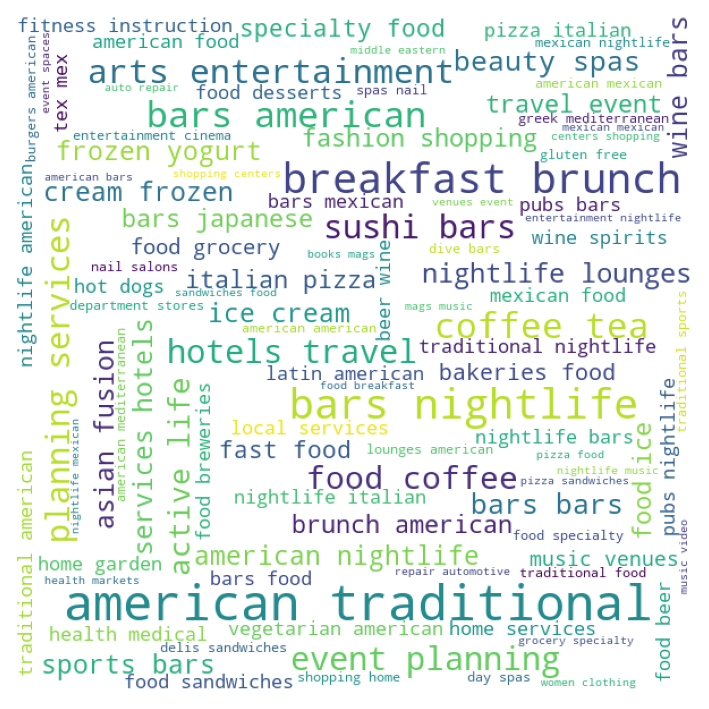

In [11]:
#wordcloud visualization for business categories
wordcloud = WordCloud( width = 600, height = 600, stopwords=stop_words, 
                      background_color='white', min_font_size=10).generate(categories)
plt.figure(figsize = (8,6), dpi=150)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
#lowercase function
def lower_data(text):
    return text.lower()

In [13]:
#remove stopwors functions
def remove_stopwords(text):
    update_token = [token for token in text if not token in stop_words]
    return update_token

In [14]:
#apply lowercase for the text
business_cat_lower = business_cat.apply(lower_data)

#Drop all text non-letter words
tokenizer = RegexpTokenizer('[a-zA-Z]+')

#tokenizing the data
categories_token = [tokenizer.tokenize(data) for data in business_cat_lower]

In [15]:
#mapping the remove stopwords function token words
review_token = list(map(remove_stopwords, categories_token))

#join all token words become single sentence
all_review = ' '.join([str(token) for token in review_token])

#tokenize the sentence
clean_reviews = tokenizer.tokenize(all_review)

### Unigram Analysis

[('restaurants', 158430), ('bars', 46339), ('american', 43656), ('food', 42991), ('nightlife', 30136), ('new', 24010), ('mexican', 19953), ('traditional', 17693), ('shopping', 15616), ('pizza', 14423), ('services', 14143), ('italian', 12610), ('hotels', 12430), ('breakfast', 11908), ('brunch', 11890), ('sandwiches', 11021), ('arts', 9568), ('burgers', 8961), ('event', 8616), ('tea', 8614)]


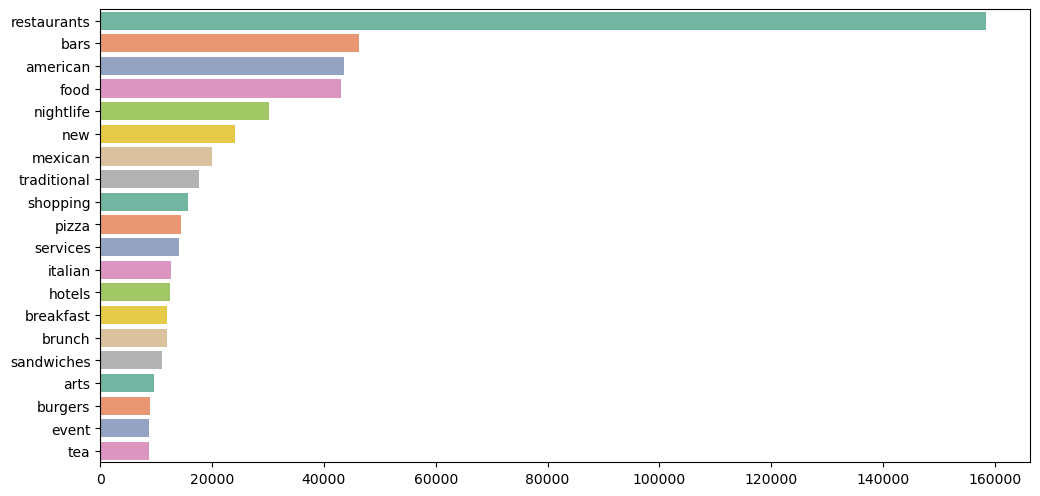

In [16]:
from nltk import FreqDist, bigrams
freq = FreqDist()

#looping and add 1 point for each same token
for word in clean_reviews:
    freq[word] +=1

#get the most 20 common words
freq = freq.most_common(20)

#set the common words as the series
all_fdist = pd.Series(dict(freq))

#Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

#seaborn plotting using Pandas attributes
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax, palette='Set2');
print(freq)

### Bigrams Analysis

[(('american', 'new'), 24010), (('american', 'traditional'), 17693), (('restaurants', 'food'), 17346), (('mexican', 'restaurants'), 16626), (('new', 'restaurants'), 14774), (('breakfast', 'brunch'), 11890), (('restaurants', 'american'), 11813), (('restaurants', 'mexican'), 10541), (('pizza', 'restaurants'), 10298), (('bars', 'nightlife'), 9829), (('sandwiches', 'restaurants'), 9570), (('restaurants', 'bars'), 9404), (('traditional', 'restaurants'), 9308), (('nightlife', 'restaurants'), 9121), (('coffee', 'tea'), 8333), (('bars', 'restaurants'), 8219), (('arts', 'entertainment'), 8002), (('bars', 'american'), 7663), (('event', 'planning'), 7436), (('hotels', 'travel'), 7396)]


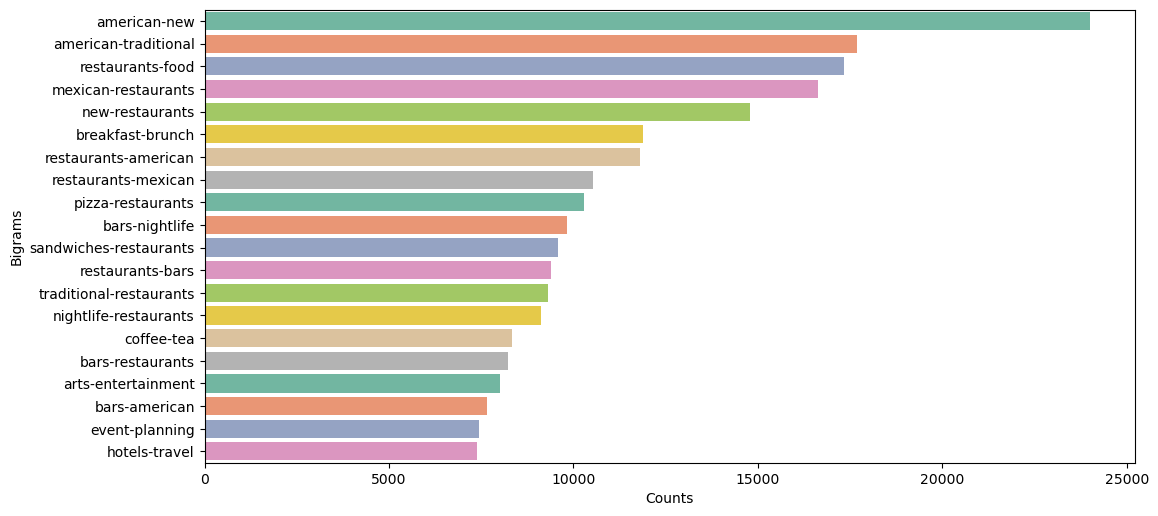

In [17]:
from nltk import FreqDist, bigrams

#apply bibrams
bigrams = bigrams(clean_reviews)
freq_bigrams = FreqDist()

#looping and add 1 point for each same two pairs token
for bigram in bigrams:
    freq_bigrams[bigram] +=1

#sort the bigrams frequensi
bg_dict_sorted = sorted(freq_bigrams.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))

#join the two pairs token
bg_str = list(map(lambda x: '-'.join(x), bg))

#create dataframe for the two pairs token
df_bg = pd.DataFrame([bg_str, counts]).T
df_bg.columns = ['Bigrams', 'Counts']

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

## Seaborn plotting using Pandas attributes
all_plot = sns.barplot(x='Counts', y='Bigrams', data=df_bg.head(20), ax=ax, palette='Set2');
print(freq_bigrams.most_common(20))

- **Note**: 
    - Restaurant is the most common word in business, and we can see that the food business dominates. Many businesses use food-related words such as , american, mexican, traditional, pizza, italian, breakfast, lunch, sandwich, and burger. Other most common business are bars, arts and entertainment, hotels and business travel.

## Text

###  Url, Punctuation and Stopwords Handling

In [18]:
#the dataset is too big, i'm using 5000 data rows only for this analysis
new_data = data.sample(5000, random_state=10)

In [19]:
#apply lowercase for each text
new_data['text'] = new_data['text'].astype('str').apply(lower_data)

####  Removal of urls

In [20]:
#count the word with 'http'
new_data['text'].str.contains('http?').sum()

30

In [21]:
#remove the 'http' link
new_data['text'] = new_data['text'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_2576\1158651039.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data['text'] = new_data['text'].str.replace('http\S+|www.\S+', '', case=False)


In [22]:
new_data['text'][new_data['text'].str.contains('http:?')]

Series([], Name: text, dtype: object)

#### Punctuation Handling

In [23]:
import string
#remove punctuation function
def remove_punc(text):
    punctuations =string.punctuation
    # remove punctuation from the string
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [24]:
#remove the punctuation from the text
new_data['text'] =new_data['text'].apply(remove_punc)

In [25]:
new_data['text']

113836    the food was fantastic and the gentleman waiti...
117122    terminal 3 doesnt have the most intuitive sign...
172283    the chandlergilbert y was my first experience ...
60142     good food must put it on your list for at leas...
50471     wow i mean wow thats about as a good as you ca...
                                ...                        
70116     whenever i step out of the car before heading ...
151317    american vision windows they dont care custome...
227540    wow started eating meat again and have been ba...
197107    yay a brand new buffet opened today     \n\nha...
143302    i started dining at sakana glendale in 04 and ...
Name: text, Length: 5000, dtype: object

#### Stopword Handling

In [26]:
tokenizer = RegexpTokenizer('[a-zA-Z]+')
#tokenize the text
new_data['text'] = [tokenizer.tokenize(data) for data in new_data['text']]

In [27]:
new_data['text']

113836    [the, food, was, fantastic, and, the, gentlema...
117122    [terminal, doesnt, have, the, most, intuitive,...
172283    [the, chandlergilbert, y, was, my, first, expe...
60142     [good, food, must, put, it, on, your, list, fo...
50471     [wow, i, mean, wow, thats, about, as, a, good,...
                                ...                        
70116     [whenever, i, step, out, of, the, car, before,...
151317    [american, vision, windows, they, dont, care, ...
227540    [wow, started, eating, meat, again, and, have,...
197107    [yay, a, brand, new, buffet, opened, today, ha...
143302    [i, started, dining, at, sakana, glendale, in,...
Name: text, Length: 5000, dtype: object

In [28]:
stop_words = stopwords.words('english')
stops1 = []

#collect the single letter token from the text
for i in range(len(new_data)):
    for token in new_data['text'].iloc[i]:
        if len(token) == 1:
            stops1.append(token)

#set as list
stops1 = list(set(stops1))

#join the single letter tokens
sent1 = ' '.join(stops1)
sent_split1 = sent1.split()

#append the single leter token to the stopwors list
for i in range(len(sent_split1)):
    stop_words.append(stops1[i])

In [29]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
stops = []

#collect the 3 letter token or lower from the text
for i in range(len(new_data)):
    for token in new_data['text'].iloc[i]:
        if len(token) <= 3:
            stops.append(token)

stops = list(set(stops))

In [31]:
#collect the words has list in nltk
words = set(nltk.corpus.words.words())

#join the words
sent = ' '.join(stops)

#join the words if not in words
sent = " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() not in words)
sent_split = sent.split()

In [32]:
#append the words to stopwords list
for i in range(len(sent_split)):
    stop_words.append(sent_split[i])

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
#remove the words if words in stopwords
new_data['text'] = new_data['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [34]:
new_data['text']

113836    [food, fantastic, gentleman, waiting, us, gave...
117122    [terminal, doesnt, intuitive, signs, especiall...
172283    [chandlergilbert, first, experience, ymcas, lo...
60142     [good, food, must, put, list, least, one, visi...
50471     [wow, mean, wow, thats, good, get, fresh, seaf...
                                ...                        
70116     [whenever, step, car, heading, joes, senses, p...
151317    [american, vision, windows, dont, care, custom...
227540    [wow, started, eating, meat, back, times, alre...
197107    [brand, new, buffet, opened, today, pleasure, ...
143302    [started, dining, sakana, glendale, dined, man...
Name: text, Length: 5000, dtype: object

In [35]:
all_text = ' '.join([str(token) for token in new_data['text']])

In [36]:
token_all_text = tokenizer.tokenize(all_text)
print(token_all_text[0:20])

['food', 'fantastic', 'gentleman', 'waiting', 'us', 'gave', 'incredible', 'service', 'even', 'humored', 'broken', 'spanish', 'cannot', 'wait', 'go', 'back', 'terminal', 'doesnt', 'intuitive', 'signs']


### Unigram Text Analysis

[('good', 3355), ('place', 3302), ('food', 3070), ('great', 2520), ('like', 2501), ('one', 2033), ('get', 2004), ('time', 1797), ('go', 1664), ('really', 1613), ('service', 1576), ('would', 1546), ('back', 1538), ('dont', 1308), ('also', 1251), ('love', 1178), ('little', 1167), ('well', 1094), ('nice', 1067), ('even', 1062)]


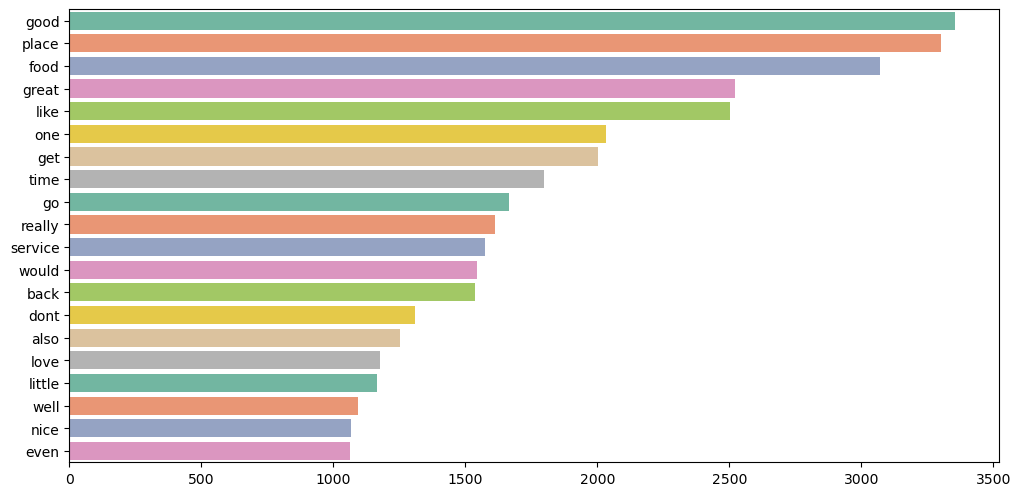

In [37]:
freq = FreqDist()

for word in token_all_text:
    freq[word] +=1
    
freq = freq.most_common(20)
all_fdist = pd.Series(dict(freq))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax, palette='Set2');
print(freq)

### Bigrams Analysis

[(('happy', 'hour'), 310), (('go', 'back'), 282), (('first', 'time'), 199), (('pretty', 'good'), 184), (('really', 'good'), 183), (('dont', 'know'), 173), (('food', 'good'), 167), (('great', 'place'), 155), (('ice', 'cream'), 155), (('next', 'time'), 150), (('come', 'back'), 145), (('customer', 'service'), 140), (('every', 'time'), 132), (('good', 'food'), 130), (('feel', 'like'), 126), (('food', 'great'), 124), (('love', 'place'), 121), (('last', 'night'), 117), (('make', 'sure'), 114), (('great', 'food'), 113)]


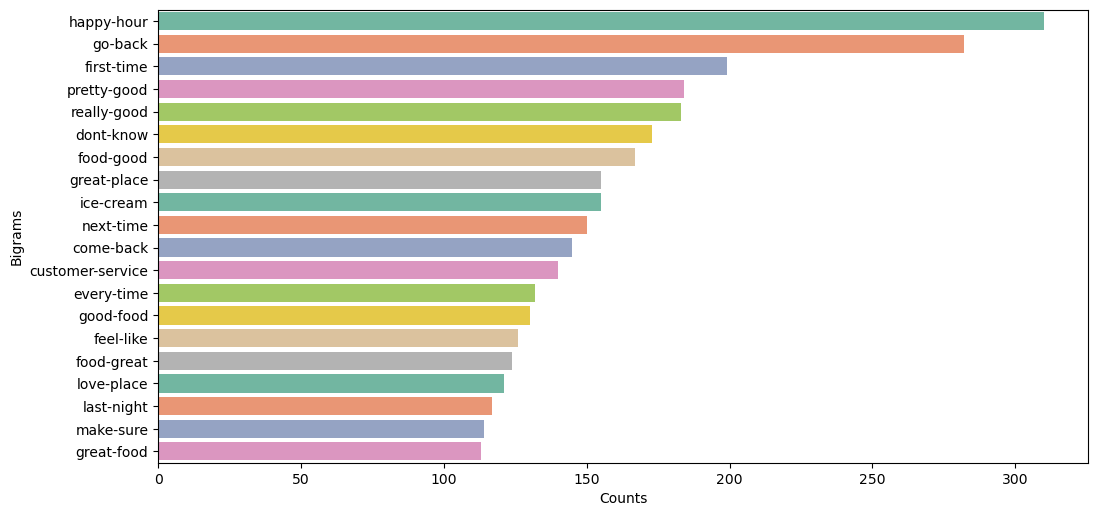

In [38]:
from nltk import FreqDist, bigrams

bigrams = bigrams(token_all_text)
freq_bigrams = FreqDist()

for bigram in bigrams:
    freq_bigrams[bigram] +=1
    
bg_dict_sorted = sorted(freq_bigrams.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))
bg_str = list(map(lambda x: '-'.join(x), bg))
df_bg = pd.DataFrame([bg_str, counts]).T
df_bg.columns = ['Bigrams', 'Counts']

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x='Counts', y='Bigrams', data=df_bg.head(20), ax=ax, palette='Set2');
print(freq_bigrams.most_common(20))

### Trigrams Analysis

[(('sweet', 'potato', 'fries'), 42), (('wait', 'go', 'back'), 38), (('cant', 'wait', 'go'), 37), (('would', 'go', 'back'), 30), (('great', 'food', 'great'), 27), (('definitely', 'go', 'back'), 26), (('cant', 'go', 'wrong'), 26), (('food', 'pretty', 'good'), 25), (('old', 'town', 'scottsdale'), 24), (('dont', 'get', 'wrong'), 23), (('love', 'love', 'love'), 23), (('every', 'time', 'go'), 22), (('food', 'great', 'service'), 22), (('go', 'back', 'try'), 21), (('great', 'customer', 'service'), 20), (('one', 'favorite', 'places'), 19), (('would', 'definitely', 'go'), 19), (('first', 'time', 'went'), 19), (('went', 'last', 'night'), 18), (('within', 'walking', 'distance'), 17)]


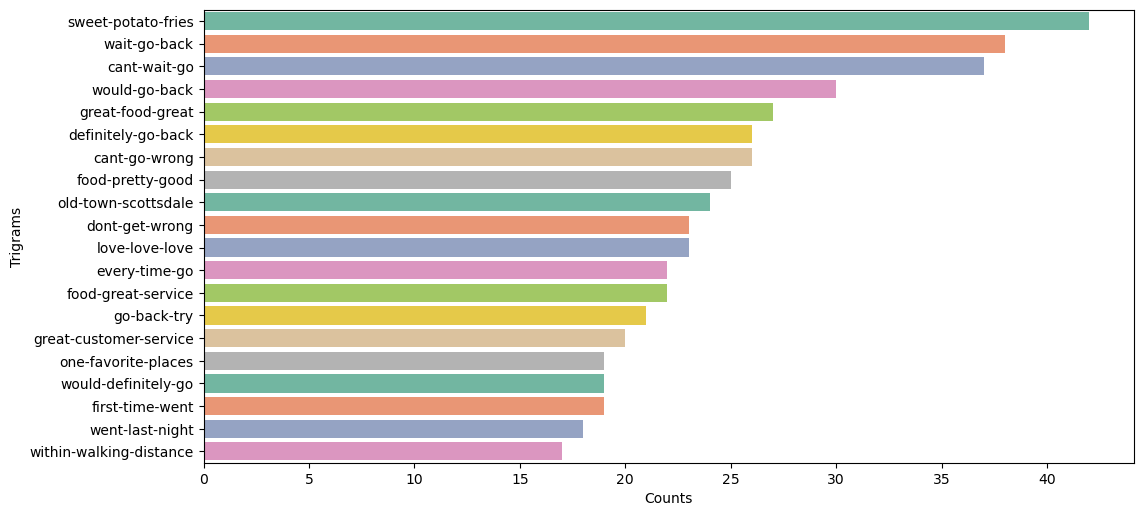

In [39]:
from nltk import FreqDist, trigrams

trigrams = trigrams(token_all_text)
freq_trigrams = FreqDist()

for trigram in trigrams:
    freq_trigrams[trigram] +=1
    
tg_dict_sorted = sorted(freq_trigrams.items(), key=lambda kv: kv[1], reverse=True)
tg, counts = list(zip(*tg_dict_sorted))
tg_str = list(map(lambda x: '-'.join(x), tg))
df_tg = pd.DataFrame([tg_str, counts]).T
df_tg.columns = ['Trigrams', 'Counts']

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x='Counts', y='Trigrams', data=df_tg.head(20), ax=ax, palette='Set2');
print(freq_trigrams.most_common(20))

- **Note**:
    - Mostly they talk about happy hour, this is usually found in restaurants, bars and other food and beverage businesses. 
    - They gave positive reviews about the food, the service and the place. They also gave their first experience review.
    - Sweet potato fries are the word three pairs at most in reviews. we can say that sweet potato fries are a common food ordered by reviewers. reviewers want to come back another time, usually because of their satisfaction with the food, the place and the service.

In [40]:
#join all token word
join_all_text = ' '.join(token_all_text)

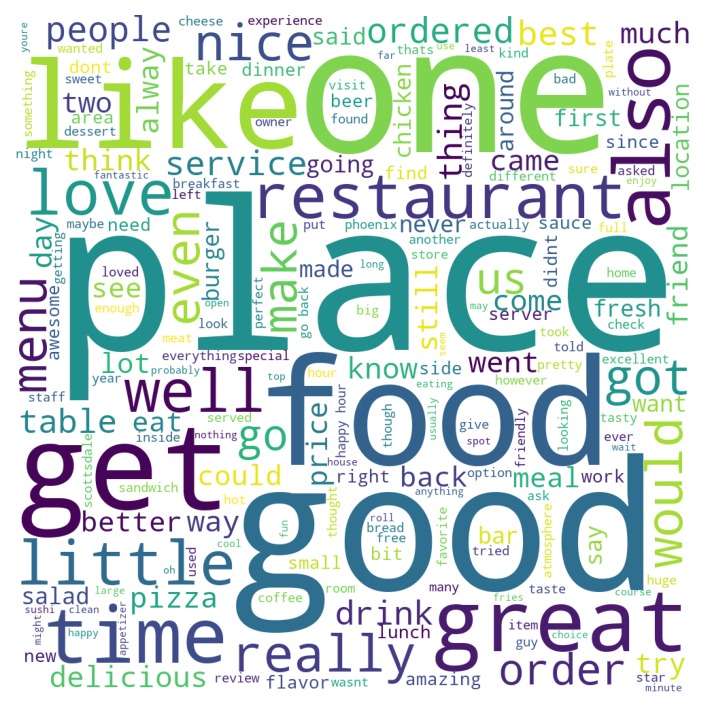

In [41]:
#wordcloud text
wordcloud = WordCloud( width = 1000, height = 1000, stopwords=stop_words, 
                      background_color='white', min_font_size=10).generate(join_all_text)
plt.figure(figsize = (12,6), dpi=150)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Sentiment Analysis

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
df_sentiment = new_data.copy()
df_sentiment['text']

113836    [food, fantastic, gentleman, waiting, us, gave...
117122    [terminal, doesnt, intuitive, signs, especiall...
172283    [chandlergilbert, first, experience, ymcas, lo...
60142     [good, food, must, put, list, least, one, visi...
50471     [wow, mean, wow, thats, good, get, fresh, seaf...
                                ...                        
70116     [whenever, step, car, heading, joes, senses, p...
151317    [american, vision, windows, dont, care, custom...
227540    [wow, started, eating, meat, back, times, alre...
197107    [brand, new, buffet, opened, today, pleasure, ...
143302    [started, dining, sakana, glendale, dined, man...
Name: text, Length: 5000, dtype: object

In [44]:
#join all token for each row
for i in range(len(df_sentiment)):
    df_sentiment['text'].iloc[i] = ' '.join(df_sentiment['text'].iloc[i])

In [45]:
df_sentiment['text']

113836    food fantastic gentleman waiting us gave incre...
117122    terminal doesnt intuitive signs especially nee...
172283    chandlergilbert first experience ymcas love pl...
60142     good food must put list least one visit staff ...
50471     wow mean wow thats good get fresh seafood put ...
                                ...                        
70116     whenever step car heading joes senses prepped ...
151317    american vision windows dont care customer sim...
227540    wow started eating meat back times already fre...
197107    brand new buffet opened today pleasure running...
143302    started dining sakana glendale dined many time...
Name: text, Length: 5000, dtype: object

In [46]:
sid = SentimentIntensityAnalyzer()

In [47]:
#create polarity score
df_sentiment['score'] = df_sentiment['text'].apply(lambda text: sid.polarity_scores(text))

#take the compound score
df_sentiment['compound'] = df_sentiment['score'].apply(lambda score: score['compound'])

#classify the text positive or negative sentiment
df_sentiment['comp_score'] = df_sentiment['compound'].apply(lambda comp: 'pos' if comp >=0 else 'neg')

In [48]:
df_sentiment[['text', 'stars', 'comp_score']]

,text,stars,comp_score
113836,food fantastic gentleman waiting us gave incre...,5,pos
117122,terminal doesnt intuitive signs especially nee...,2,pos
172283,chandlergilbert first experience ymcas love pl...,4,pos
60142,good food must put list least one visit staff ...,4,pos
50471,wow mean wow thats good get fresh seafood put ...,5,pos
...,...,...,...
70116,whenever step car heading joes senses prepped ...,4,pos
151317,american vision windows dont care customer sim...,1,neg
227540,wow started eating meat back times already fre...,5,pos
197107,brand new buffet opened today pleasure running...,4,pos


In [49]:
#sentiment count
df_sentiment['comp_score'].value_counts()

pos    4650
neg     350
Name: comp_score, dtype: int64

<AxesSubplot:xlabel='stars', ylabel='count'>

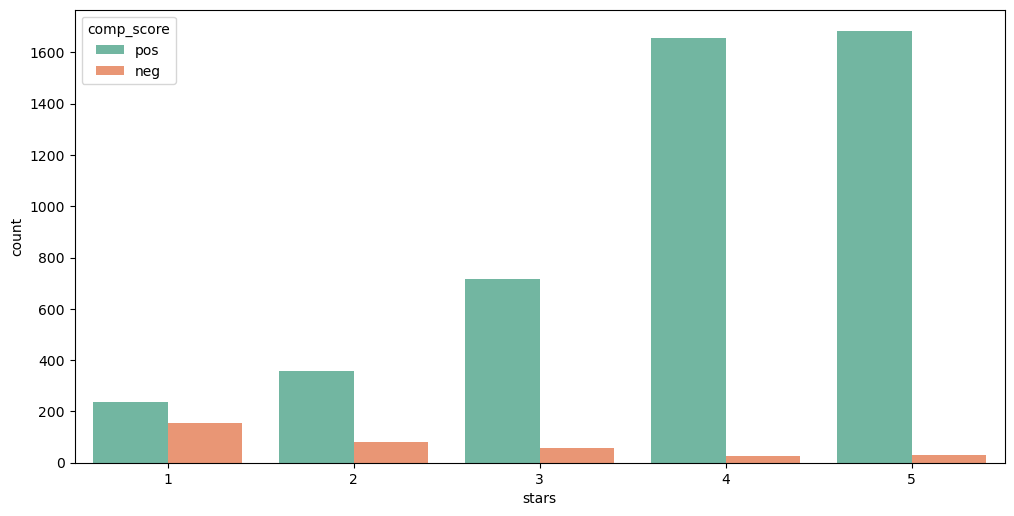

In [50]:
plt.figure(figsize=(12,6), dpi=100)
sns.countplot(data = df_sentiment, x='stars', hue= 'comp_score', palette='Set2')

In [51]:
#data frame for negative sentiment only
neg_sentiment = df_sentiment[['text', 'stars', 'comp_score']][df_sentiment['comp_score'] == 'neg']
neg_sentiment.head()

,text,stars,comp_score
229208,recently got update local yelper joint closed ...,3,neg
41410,avoid market first wednesday every month costs...,3,neg
105907,hipster puppies book tetris socks douchebag em...,4,neg
141084,girl taking order drivethru rude kept interrup...,1,neg
203079,first visit chase field unfortunately press su...,5,neg


<AxesSubplot:xlabel='stars', ylabel='count'>

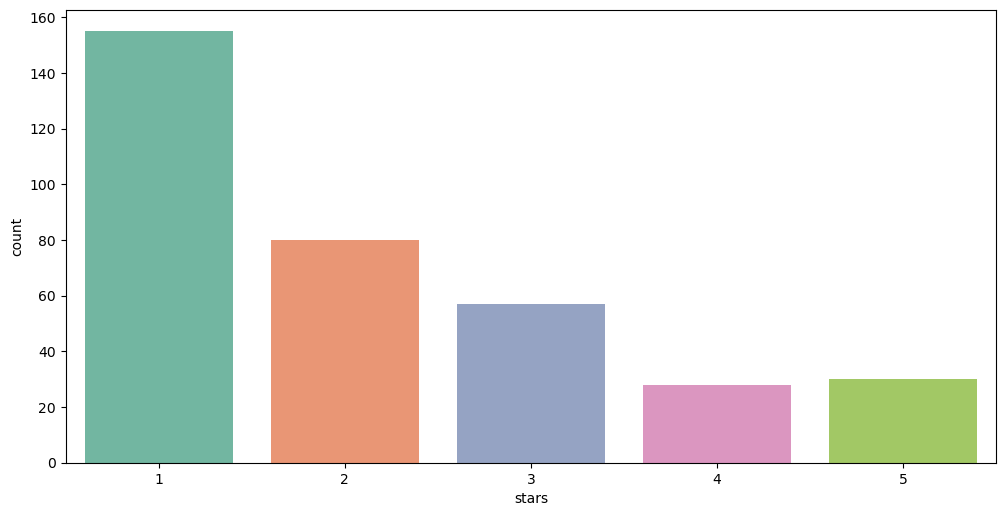

In [52]:
#stars visualization for negative sentiment
plt.figure(figsize=(12,6), dpi=100)
sns.countplot(neg_sentiment['stars'], palette='Set2')

In [53]:
#one of the text with positve sentiment but  give 4 star 
data['text'].iloc[105907]

'Hipster Puppies Book.\nTetris Socks.\nDouchebag employees.\n\nYep, its an Urban Outfitters, but it is still a fun place to kill time.'

- **Note**
    - Many reviewers give a low start with positive sentiment and a high star but give a review with negative sentiment. this reviews can confuse the business owners and the reviewers.

In [54]:
all_neg_text = ' '.join([str(token) for token in neg_sentiment['text']])

In [55]:
token_neg_text = tokenizer.tokenize(all_neg_text)

[(('never', 'go', 'back'), 5), (('food', 'nothing', 'special'), 5), (('never', 'going', 'back'), 4), (('wont', 'go', 'back'), 3), (('looked', 'menu', 'decided'), 3), (('every', 'time', 'go'), 3), (('isnt', 'good', 'enough'), 3), (('go', 'somewhere', 'else'), 2), (('nice', 'would', 'think'), 2), (('breakfast', 'nachos', 'hangover'), 2), (('nachos', 'hangover', 'sandwich'), 2), (('starts', 'yelling', 'saying'), 2), (('place', 'would', 'get'), 2), (('lions', 'tigers', 'bears'), 2), (('tigers', 'bears', 'oh'), 2), (('go', 'back', 'never'), 2), (('back', 'never', 'go'), 2), (('wasnt', 'impressed', 'place'), 2), (('within', 'walking', 'distance'), 2), (('waited', 'waited', 'waited'), 2)]


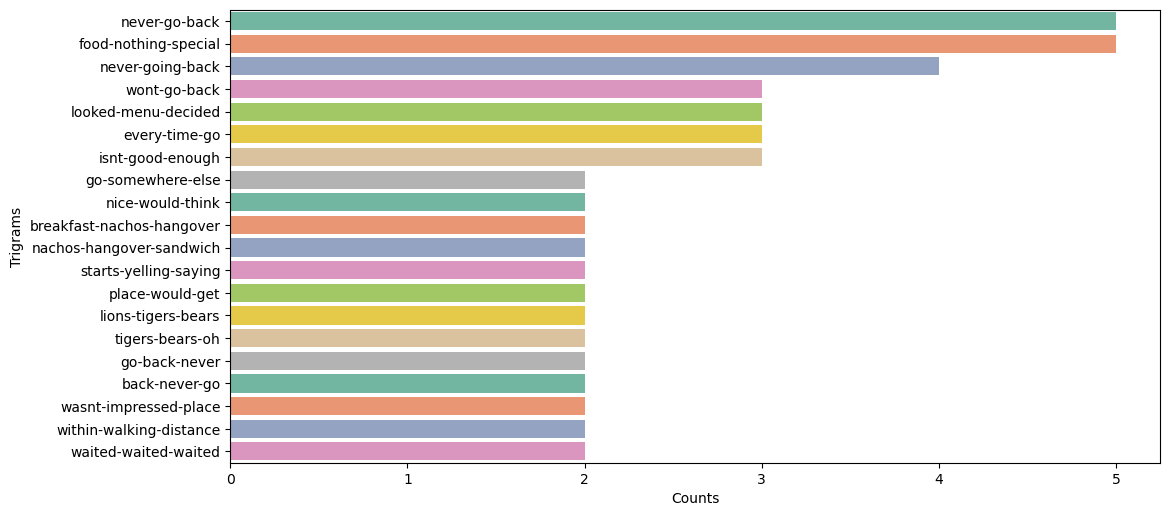

In [56]:
from nltk import FreqDist, trigrams

trigrams = trigrams(token_neg_text)
freq_trigrams = FreqDist()

for trigram in trigrams:
    freq_trigrams[trigram] +=1
    
tg_dict_sorted = sorted(freq_trigrams.items(), key=lambda kv: kv[1], reverse=True)
tg, counts = list(zip(*tg_dict_sorted))
tg_str = list(map(lambda x: '-'.join(x), tg))
df_tg = pd.DataFrame([tg_str, counts]).T
df_tg.columns = ['Trigrams', 'Counts']

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x='Counts', y='Trigrams', data=df_tg.head(20), ax=ax, palette='Set2');
print(freq_trigrams.most_common(20))

- **Note**
    - In negative sentiment, the reviewer decided not to return to that place. They were dissatisfied with their experience like nothing special for the food and menu, poor service from the waiters, and long time to get their food and order and they also suggest to go elsewhere.